In [2]:
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\AppData\Local\Temp\ipykernel_1736\994255653.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
CARDIO_BASE_df = pd.read_csv('C:\\Users\\hp\\Desktop\\Projects\\Hypothesis-Testing\\Data\\cardio_base.csv',delimiter=',')
CARDIO_BASE_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [4]:
CARDIO_BASE_df["age"] = CARDIO_BASE_df["age"].apply(lambda x:math.floor(x/365))
CARDIO_BASE_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0


# Parametric test

In [5]:
import seaborn as sns

<Axes: xlabel='weight', ylabel='Density'>

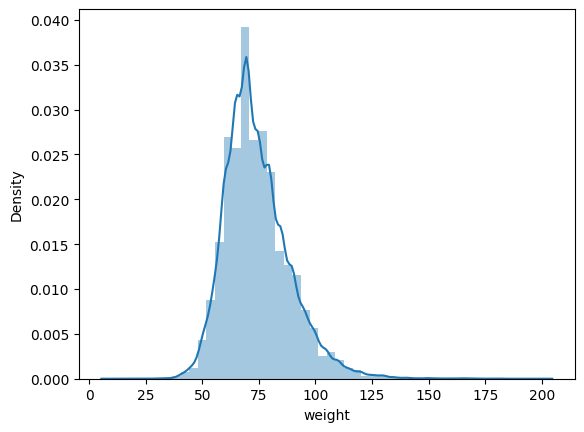

In [6]:
# checking for normally distributed data beacuse parametric test give accurate results with normally distributes data 
# although parameteric test can also be done for non - normal distributed data
sns.distplot(CARDIO_BASE_df["weight"])

### Ztest
* one sample test
* two sample test

In [7]:
# ztest is used for comparing the means of one sample with specified population mean value is known as one sample test,
# where comparing two samples means differenece or correlation with each other is called two sample test 
from statsmodels.stats.weightstats import ztest

In [8]:
# one sample ztest
# If the p-value <0.05 than null hypothesis of having sample mean equal to 74.15 is rejected
ztest(x1 = CARDIO_BASE_df["weight"].sample(100).values,value = 74.15)

(1.4494978444004245, 0.14719860188549572)

In [9]:
# two sample ztest
# If the p-value <0.05 than null hypothesis of having samples mean difference equal to 0 is rejected
# Here the standard deviation of the samples is assumed to be the same, usevar : 'pooled' by default
# You can change the hypotheis using "alternative" paramneter

# this two sample z test also can be used for independent paired samples for comparing difference in means
ztest(x1 = CARDIO_BASE_df["weight"].sample(100).values,x2 = CARDIO_BASE_df["weight"].sample(100).values,value = 0)

(-0.1707558010011668, 0.8644157842404898)

#### Take knowledge about parameters from statsmodel documentation

## T-test
* one sample test
* Independent two sample
    1. equal variance
    2. uneuqal variance
* Dependent/Paired two sample

In [10]:
# t-test is used when we do not know the population standard deviation
from scipy.stats import ttest_1samp

In [12]:
# one sample t-test
# alternative parameter is used for <,> = popmean

ttest_1samp(a=CARDIO_BASE_df["weight"].sample(100).values, popmean=74.15)

TtestResult(statistic=0.5943557248176086, pvalue=0.5536300703557842, df=99)

### Independent sample test

### two independent sample t test for comparing the two independent sample mean are eaual, less , greater depending on 'altenative' parameter


In [ ]:
# Researchers want to know whether or not two different species of plants have the same mean height. To test this, they collect a simple random sample of 20 plants from each species.

In [14]:
# two independent sample t test for comparing the two independent population mean are eaual, less , greater depending on 'altenative' parameter
from scipy.stats import ttest_ind
import numpy as np

In [24]:
# Before we perform the test, we need to decide if we’ll assume the two populations have equal variances or not. As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1. 

group1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
group2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])
print(np.var(group1), np.var(group2))


7.727500000000001 12.260000000000002


In [25]:
12.260000000000002/7.727500000000001

1.586541572306697

In [26]:
#perform two sample t-test with equal variances
ttest_ind(a=group1, b=group2, equal_var=True)


TtestResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257, df=38.0)

In [33]:
group1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
group2 = np.array([15, 5, 10, 2, 16, 8, 12, 3, 19, 5, 17, 1, 24, 16, 13, 16, 13, 18, 15, 13])
print(np.var(group1), np.var(group2))

7.727500000000001 37.1475


In [34]:
37.1475/7.727500000000001

4.807182141701714

In [35]:
#perform two sample t-test with unequal variances
ttest_ind(a=group1, b=group2, equal_var=False)


TtestResult(statistic=2.0171410309442077, pvalue=0.05388591692360517, df=26.57695965396336)

In [36]:
# equal_var: if True, perform a standard independent 2 sample t-test that assumes equal population variances. If False, perform Welch’s t-test, which does not assume equal population variances. This is True by default.

### Paried samples or dependent samples t test 

In [ ]:
# Suppose we want to know whether a certain study program significantly impacts student performance on a particular exam. To test this, we have 15 students in a class take a pre-test. Then, we have each of the students participate in the study program for two weeks. Then, the students retake a test of similar difficulty.

# To compare the difference between the mean scores on the first and second test, we use a paired samples t-test because for each student their first test score can be paired with their second test score.

In [37]:
pre = [88, 82, 84, 93, 75, 78, 84, 87, 95, 91, 83, 89, 77, 68, 91]
post = [91, 84, 88, 90, 79, 80, 88, 90, 90, 96, 88, 89, 81, 74, 92]

In [39]:
from scipy.stats import ttest_rel

#perform the paired samples t-test
ttest_rel(pre, post)


TtestResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272, df=14)

In [40]:
# The test statistic is -2.9732 and the corresponding two-sided p-value is 0.0101.

# Since the p-value (0.0101) is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean test score is different for students before and after participating in the study program.

In [41]:
from scipy.stats import pearsonr

In [42]:
# alternative{‘two-sided’, ‘greater’, ‘less’}, optional
# Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:

# ‘two-sided’: the correlation is nonzero

# ‘less’: the correlation is negative (less than zero)

# ‘greater’: the correlation is positive (greater than zero)

pearsonr(x=CARDIO_BASE_df["weight"].sample(100).values,y = CARDIO_BASE_df["weight"].sample(100).values)

PearsonRResult(statistic=0.05656408462606825, pvalue=0.5761773029715989)

In [7]:
# An F-test is used to test whether two population variances are equal. The null and alternative hypotheses for the test are as follows:

# H0: σ12 = σ22 (the population variances are equal)
# H1: σ12 ≠ σ22 (the population variances are not equal)

x = [18, 19, 22, 25, 27, 28, 41, 45, 51, 55]
y = [14, 15, 15, 17, 18, 22, 25, 25, 27, 34]

import numpy as np
import scipy
#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic  #ddof N-ddof or N-1
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test

# The F test statistic is 4.38712 and the corresponding p-value is 0.019127. Since this p-value is less than .05, we would reject the null hypothesis. 
# This means we have sufficient evidence to say that the two population variances are not equal.
f_test(x, y)
# example
#  Does a new treatment or process reduce the variability of some current treatment or process?

(4.387122002085505, 0.01912653593238578)

In [9]:
# A one-way ANOVA (“analysis of variance”) is used to determine whether or not there is a statistically significant difference between the 
# means of three or more independent groups.

# A researcher recruits 30 students to participate in a study. The students are randomly assigned to use one of three studying techniques for the next three weeks to prepare for an exam. At the end of the three weeks, all of the students take the same test. 
# Use the following steps to perform a one-way ANOVA to determine if the average scores are the same across all three groups.

#enter exam scores for each group
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

from scipy.stats import f_oneway

#perform one-way ANOVA
f_oneway(group1, group2, group3)

# The F test statistic is 2.3575 and the corresponding p-value is 0.1138. Since the p-value is not less than .05, we fail to reject the null hypothesis.
# This means we do not have sufficient evidence to say that there is a difference in exam scores among the three studying techniques.






F_onewayResult(statistic=2.3575322551335636, pvalue=0.11384795345837219)

In [1]:
# two way annova

# A botanist wants to know whether or not plant growth is influenced by sunlight exposure and watering frequency. 
# She plants 30 seeds and lets them grow for two months under different conditions for sunlight exposure and watering frequency. 
# After two months, she records the height of each plant, in inches

# To perform a two-way ANOVA to determine if watering frequency and sunlight exposure have a significant effect on plant growth, and 
# to determine if there is any interaction effect between watering frequency and sunlight exposure.


# water: how frequently each plant was watered: daily or weekly
# sun: how much sunlight exposure each plant received: low, medium, or high
# height: the height of each plant (in inches) after two months

import numpy as np
import pandas as pd

#create data
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

#view first ten rows of data 
df[:10]

C:\Users\hp\AppData\Local\Temp\ipykernel_3424\4239627597.py:16: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,med,5
6,daily,med,5
7,daily,med,6
8,daily,med,4
9,daily,med,5


In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

# water: p-value = .000527
# sun: p-value = .0000002
# water*sun: p-value = .120667

# Since the p-values for water and sun are both less than .05, this means that both factors have a statistically significant effect on plant height.
# And since the p-value for the interaction effect (.120667) is not less than .05, this tells us that there is no significant interaction effect between 
# sunlight exposure and watering frequency.

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


In [3]:
# A three-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups 
# that have been split on three factors.

"""
Suppose a researcher wants to determine if two training programs lead to different mean improvements in jumping height among college basketball players.

The researcher suspects that gender and division (Division I or II) may also affect jumping height so he collects data for these factors as well.

His goal is to perform a three-way ANOVA to determine how training program, gender, and division affect jumping height.

"""

import numpy as np
import pandas as pd

#create DataFrame
df = pd.DataFrame({'program': np.repeat([1, 2], 20),
                   'gender': np.tile(np.repeat(['M', 'F'], 10), 2),
                   'division': np.tile(np.repeat([1, 2], 5), 4),
                   'height': [7, 7, 8, 8, 7, 6, 6, 5, 6, 5,
                              5, 5, 4, 5, 4, 3, 3, 4, 3, 3,
                              6, 6, 5, 4, 5, 4, 5, 4, 4, 3,
                              2, 2, 1, 4, 4, 2, 1, 1, 2, 1]})

#view first ten rows of DataFrame 
df[:10]

,program,gender,division,height
0,1,M,1,7
1,1,M,1,7
2,1,M,1,8
3,1,M,1,8
4,1,M,1,7
5,1,M,2,6
6,1,M,2,6
7,1,M,2,5
8,1,M,2,6
9,1,M,2,5


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform three-way ANOVA
model = ols("""height ~ C(program) + C(gender) + C(division) +
               C(program):C(gender) + C(program):C(division) + C(gender):C(division) +
               C(program):C(gender):C(division)""", data=df).fit()

sm.stats.anova_lm(model, typ=2)

"""
In conclusion, we would state that training program, gender, and division are all significant predictors of the jumping height increase among players.

We would also state that there are no significant interaction effects between these three factors.

"""

,sum_sq,df,F,PR(>F)
C(program),3.610000e+01,1.0,6.563636e+01,2.983934e-09
C(gender),6.760000e+01,1.0,1.229091e+02,1.714432e-12
C(division),1.960000e+01,1.0,3.563636e+01,1.185218e-06
C(program):C(gender),4.046860e-30,1.0,7.357928e-30,1.000000e+00
C(program):C(division),4.000000e-01,1.0,7.272727e-01,4.001069e-01
C(gender):C(division),1.000000e-01,1.0,1.818182e-01,6.726702e-01
C(program):C(gender):C(division),1.000000e-01,1.0,1.818182e-01,6.726702e-01
Residual,1.760000e+01,32.0,NaN,NaN


In [8]:
#Repeated ANNOVA

"""
A repeated measures ANOVA is used to determine whether or not there is a statistically significant difference 
between the means of three or more groups in which the same subjects show up in each group

"""

"""
Researchers want to know if four different drugs lead to different reaction times. 
To test this, they measure the reaction time of five patients on the four different drugs.

Since each patient is measured on each of the four drugs, we will use a repeated measures ANOVA to determine if the mean reaction time differs between drugs.

"""

import numpy as np
import pandas as pd

#create data
df = pd.DataFrame({'patient': np.repeat([1, 2, 3, 4, 5], 4),
                   'drug': np.tile([1, 2, 3, 4], 5),
                   'response': [30, 28, 16, 34,
                                14, 18, 10, 22,
                                24, 20, 18, 30,
                                38, 34, 20, 44, 
                                26, 28, 14, 30]})

#view first ten rows of data 
df.head()

,patient,drug,response
0,1,1,30
1,1,2,28
2,1,3,16
3,1,4,34
4,2,1,14


In [11]:
from statsmodels.stats.anova import AnovaRM

#perform the repeated measures ANOVA
print(AnovaRM(data=df, depvar='response', subject='patient', within=['drug']).fit())

#Since this p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically 
# significant difference in mean response times between the four drugs.
# Results showed that the type of drug used lead to statistically significant differences in response time (F(3, 12) = 24.75887, p < 0.001).


              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
drug 24.7589 3.0000 12.0000 0.0000



# Non-Paramteric test

1. Wilcoxon Test
    * one sample
    * two sample
        1. Indepenedent (sum rank) --> Mann Whitney
        2. dependent (signed rank)


In [1]:
# the differences in height between cross- and self-fertilized corn plants is given as follows
d = [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]
# Cross-fertilized plants appear to be higher. To test the null hypothesis that there is no height difference, we can apply the two-sided test

In [6]:
# Wilcoxon matched pair test is a non-parametric hypothesis test that compares the median of two paired groups and tells if they are identically distributed or not. 
from scipy.stats import wilcoxon
res = wilcoxon(d)
res.statistic, res.pvalue
# Hence, we would reject the null hypothesis at a confidence level of 5%, concluding that there is a difference in height between the groups. 


(24.0, 0.041259765625)

In [11]:
# Define your data
# one sample test
data = [22, 33, 45, 55, 12, 33, 56, 78, 34, 23]

# Define the median you want to compare with
median_to_compare = 100000

# Center the data around the alternative median
centered_data = [x - median_to_compare for x in data]

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(centered_data, alternative='greater')

# Print the results
print("Wilcoxon signed-rank statistic:", statistic)
print("p-value:", p_value)

Wilcoxon signed-rank statistic: 0.0
p-value: 1.0


In [7]:
# In the example above, the differences in height between paired plants are provided to wilcoxon directly.
# Alternatively, wilcoxon accepts two samples of equal length, calculates the differences between paired elements, then performs the test. 
# Consider the samples x and y:


# two sampled paired test
import numpy as np
x = np.array([0.5, 0.825, 0.375, 0.5])
y = np.array([0.525, 0.775, 0.325, 0.55])
res = wilcoxon(x, y, alternative='greater')
res

WilcoxonResult(statistic=5.0, pvalue=0.5625)

In [13]:
# two sample independent test
# Mann Whiteney test (handle ties cases unlike rank sums)

from scipy.stats import mannwhitneyu

males = [19, 22, 16, 29, 24]
females = [20, 11, 17, 12]
mannwhitneyu(males, females, method="exact") #exact i

MannwhitneyuResult(statistic=17.0, pvalue=0.1111111111111111)

In [1]:
#runs test (Wald-Wolfowitz runs test)

# Runs test is a statistical test that is used to determine whether or not a dataset comes from a random process.


from statsmodels.sandbox.stats.runs import runstest_1samp 

#create dataset
data = [12, 16, 16, 15, 14, 18, 19, 21, 13, 13]

#Perform Runs test
# for sample n1<20 and n2<20
# G is calucation and test using G table

# for greater than 20 ztest is used

runstest_1samp(data, correction=False)
# The z-test statistic turns out to be -0.67082 and the corresponding p-value is 0.50233. Since this p-value is not less than α = .05, we fail to reject the null hypothesis. We have sufficient evidence to say that the data was produced in a random manner.

(-0.6708203932499369, 0.5023349543605021)

In [3]:
data = ['H','H','T','H','T','T','T','H','T']
data = [0,0,1,0,1,1,1,0,1]

# for numeric meadian or mean is used as cutoff
 
runstest_1samp(data, correction=False)


(0.4016096644512493, 0.6879713161806407)

In [21]:
from statsmodels.sandbox.stats.runs import runstest_2samp

d1 = [1,2,3,4,5]
d2 = [1000,10000,3000.5,60000.75]

#should be floating point data atleast in one list d2

runstest_2samp(d1,d2)

# we reject the null hypothesis of having both data came from same distribution

(-2.128531221591622, 0.0332930641698115)

In [36]:
#  one-sample Kolmogorov-Smirnov test for goodness of fit.
# This test compares the underlying distribution F(x) of a sample against a given continuous distribution G(x).

import numpy as np
from  scipy import stats
import seaborn as sns

In [64]:
rng = np.random.default_rng(20)
x = stats.norm.rvs(size=100, random_state=rng) # Prepare normal distributed data
stats.ks_1samp(x, stats.chi2(2).cdf) #two degrees of freedom    

KstestResult(statistic=0.5333222967193604, pvalue=4.294509346688844e-27, statistic_location=0.31723592758455404, statistic_sign=1)

In [62]:
stats.chi2.cdf

<bound method rv_continuous.cdf of <scipy.stats._continuous_distns.chi2_gen object at 0x000001B7C4EAF7F0>>

In [66]:
# two sample Kolmogorov-Smirnov test

rng = np.random.default_rng()
sample1 = stats.uniform.rvs(size=100, random_state=rng)
sample2 = stats.norm.rvs(size=110, random_state=rng)
stats.ks_2samp(sample1, sample2)

KstestResult(statistic=0.49818181818181817, pvalue=2.314568958008009e-12, statistic_location=0.0455010502903857, statistic_sign=-1)

In [1]:
# chi2 goodness of fit

# importing packages 
import scipy.stats as stats 
import numpy as np 
  
# no of hours a student studies 
# in a week vs expected no of hours 
observed_data = [8, 6, 10, 7, 8, 11, 9] 
expected_data = [9, 8, 11, 8, 10, 7, 6] 
  
  
# Chi-Square Goodness of Fit Test 
chi_square_test_statistic, p_value = stats.chisquare( 
    observed_data, expected_data) 
  
# chi square test statistic and p value 
print('chi_square_test_statistic is : ' +
      str(chi_square_test_statistic)) 
print('p_value : ' + str(p_value)) 
  
  
# find Chi-Square critical value 
print(stats.chi2.ppf(1-0.05, df=6)) 

chi_square_test_statistic is : 5.0127344877344875
p_value : 0.542180861413329
12.591587243743977


In [3]:
# chi2 test of independence

# Suppose we want to know whether or not gender is associated with political party preference. 
# We take a simple random sample of 500 voters and survey them on their political party preference. The following table shows the results of the survey:

data = [[120, 90, 40],
        [110, 95, 45]]

import scipy.stats as stats

#perform the Chi-Square Test of Independence
stats.chi2_contingency(data)
# with expected vales



Chi2ContingencyResult(statistic=0.8640353908896108, pvalue=0.6491978887380976, dof=2, expected_freq=array([[115. ,  92.5,  42.5],
       [115. ,  92.5,  42.5]]))

In [ ]:
# Assumptions of ch2 test

# Assumption 1: Both variables are categorical.
# Gender: This variable can only take on two categories – Male or Female.
# Political Party Preference: This variable can take on three categories – Republican, Democrat, or Independent.


# Assumption 2: All observations are independent. (two people should not from same family)
# It’s assumed that every observation in the dataset is independent. 
# That is, the value of one observation in the dataset does not affect the value of any other observation.
# The only way to check this assumption is to verify that each individual included in this dataset was surveyed independently of every other individual.
# If we used a random sampling method (like simple random sampling) then this assumption is likely met.


# Assumption 3: Cells in the contingency table are mutually exclusive.
# We can verify that this assumption is met by checking that no individual has been counted in more than one cell. 
# Assuming each individual in the dataset was only surveyed once, this assumption should be met 
# because it’s not possible for an individual to be, say, a Male Republican and a Female Democrat simultaneously.

# Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.
# It’s assumed that the expected value of cells in the contingency table should be 5 or greater in at least 80% of cells and 
# that no cell should have an expected value less than 1.


# Expected value = (row sum * column sum) / table sum.
# For example, the expected value for Male Republicans is: (230*250) / 500 = 115.

In [4]:
# One special type of correlation is called Spearman Rank Correlation, which is used to measure the correlation between two ranked variables. 
# (e.g. rank of a student’s math exam score vs. rank of their science exam score in a class).

import pandas as pd

#create DataFrame
df = pd.DataFrame({'student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                   'math': [70, 78, 90, 87, 84, 86, 91, 74, 83, 85],
                   'science': [90, 94, 79, 86, 84, 83, 88, 92, 76, 75]})

from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(df['math'], df['science'])

#print Spearman rank correlation and p-value
print(rho)

print(p)



# From the output we can see that the Spearman rank correlation is -0.41818 and the corresponding p-value is 0.22911.
# This indicates that there is a negative correlation between the science and math exam scores.
# However, since the p-value of the correlation is not less than 0.05, the correlation is not statistically significant.            

-0.41818181818181815
0.22911284098281892


C:\Users\hp\AppData\Local\Temp\ipykernel_10696\4048725809.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Kohen's kappa acore

"""
Suppose two art museum curators are asked to rate 15 paintings on whether they’re good enough to be shown in a new exhibit.

"""

from sklearn.metrics import cohen_kappa_score

#define array of ratings for both raters
rater1 = [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
rater2 = [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]

#calculate Cohen's Kappa
cohen_kappa_score(rater1, rater2)

# Cohen’s Kappa turns out to be 0.33628.

# Based on the table earlier, we would say that the two raters only had a “fair” level of agreement.


0.33628318584070793

In [54]:
# kohen's kappa version for more than 2
# fleiss_kappa
from statsmodels.stats.inter_rater import fleiss_kappa
import pandas as pd

rater1 = [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
rater2 = [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]
rater3 = [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]

rating_table = pd.DataFrame({'rater1':rater1,"rater2":rater2,"rater3":rater3})
melted_table = pd.melt(rating_table)
crosstab_table = pd.crosstab(melted_table["variable"],melted_table["value"])

fleiss_kappa(crosstab_table)


-0.06719367588932806

In [55]:
# Shapiro-Wilk Test on Normally Distributed Data

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

#set seed (e.g. make this example reproducible)
seed(0)

#generate dataset of 100 random values that follow a standard normal distribution
data = randn(100)

#perform Shapiro-Wilk test
shapiro(data)

# From the output we can see that the test statistic is 0.9927 and the corresponding p-value is 0.8689.

# Since the p-value is not less than .05, we fail to reject the null hypothesis.
#  We do not have sufficient evidence to say that the sample data does not come from a normal distribution.

ShapiroResult(statistic=0.992694081874749, pvalue=0.8689366682774949)

In [56]:
from numpy.random import poisson
#set seed (e.g. make this example reproducible)
seed(0)

#generate dataset of 100 values that follow a Poisson distribution with mean=5
data = poisson(5, 100)

shapiro(data)


ShapiroResult(statistic=0.9581912025699156, pvalue=0.0029943533404083625)

In [ ]:
# From the output we can see that the test statistic is 0.9582 and the corresponding p-value is 0.00299.

# Since the p-value is less than .05, we reject the null hypothesis.
#  We have sufficient evidence to say that the sample data does not come from a normal distribution.